In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [25]:
infra = pd.read_csv("C:/Users/Dell/Desktop/eval_mongodb/crim_gen_1_Data.csv", sep=',')
infra.head()

,TIME,GEO,UNIT,ICCS,Value,Flag and Footnotes
0,1998,Belgique,Nombre,Total,NaN,NaN
1,1998,Belgique,Nombre,Homicide intentionnel,NaN,NaN
2,1998,Belgique,Nombre,Actes portant atteinte ou visant à porter atte...,NaN,NaN
3,1998,Belgique,Nombre,Vol qualifié,NaN,NaN
4,1998,Belgique,Nombre,Cambriolage de locaux résidentiels privés,NaN,NaN


In [26]:
infra = infra[infra['TIME'] == 2007]
infra = infra.fillna(0)
infra = infra.drop(columns=['UNIT', 'Flag and Footnotes'])
infra = infra.drop(infra[infra.ICCS == "Total"].index)
infra

,TIME,GEO,ICCS,Value
1756,2007,Belgique,Homicide intentionnel,211.0
1757,2007,Belgique,Actes portant atteinte ou visant à porter atte...,115645.0
1758,2007,Belgique,Vol qualifié,21186.0
1759,2007,Belgique,Cambriolage de locaux résidentiels privés,62964.0
1761,2007,Bulgarie,Homicide intentionnel,169.0
1762,2007,Bulgarie,Actes portant atteinte ou visant à porter atte...,8696.0
1763,2007,Bulgarie,Vol qualifié,2996.0
1764,2007,Bulgarie,Cambriolage de locaux résidentiels privés,22208.0
1766,2007,Tchéquie,Homicide intentionnel,126.0
1767,2007,Tchéquie,Actes portant atteinte ou visant à porter atte...,19976.0


In [27]:
final = infra.groupby(['ICCS'])['Value'].sum()
final = final.to_frame()
final = final.reset_index()
final

,ICCS,Value
0,Actes portant atteinte ou visant à porter atte...,2955928.0
1,Cambriolage de locaux résidentiels privés,1586602.0
2,Homicide intentionnel,11079.0
3,Vol qualifié,700699.0


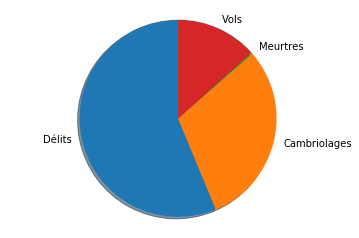

In [35]:
labels = 'Délits', 'Cambriolages', 'Meurtres', 'Vols'
fig1, ax1 = plt.subplots()

ax1.pie(final['Value'], labels=labels, shadow=True, startangle=90)
ax1.axis('equal')

plt.show()